In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [6]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))

rng = np.random.RandomState(0)
X = rng.randn(200, 2)
Y = np.logical_xor(X[:,0]>0, X[:,1] > 0)

In [25]:
# fit the model
svm = SVC(probability=True).fit(X,Y)
bayes = GaussianNB().fit(X,Y)
knn = KNeighborsClassifier().fit(X,Y)
clfs = [svm, bayes, knn]
names = ["SVM", "BAYES", "KNN"]

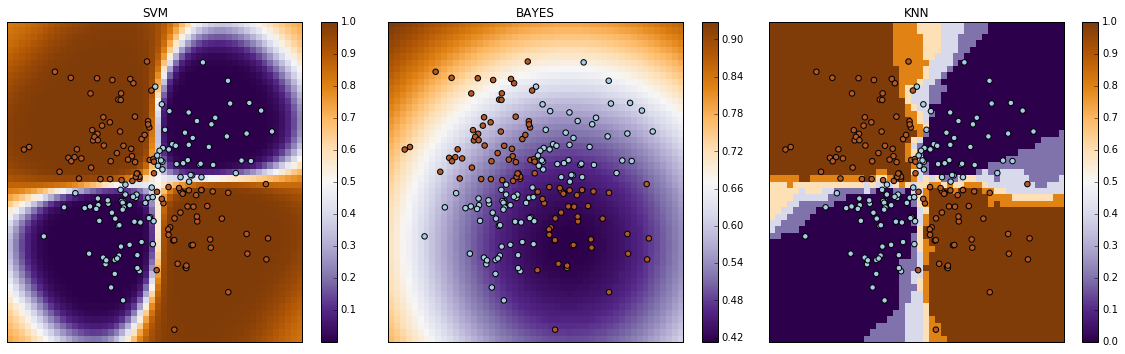

In [27]:
# plot the decision function for each datapoint on the grid
plt.figure(figsize=(16,5))
for i, clf in enumerate(clfs):
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:,1]
    Z = Z.reshape(xx.shape)

    plt.subplot(1,3, i+1)
    image = plt.imshow(Z, interpolation='nearest', 
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)

    plt.scatter(X[:,0], X[:,1], s = 30, c=Y, cmap = plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(names[i])

plt.tight_layout()
plt.show()